In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import h5py
from importlib import reload
import cv2
import cntk as C
from scipy.ndimage import affine_transform, rotate, zoom, shift
from sklearn.decomposition import PCA
from utilities import *
from GradDesOrient import *
from VTKFunctions import *
from volume_extraction import *
from scipy.signal import medfilt
from argparse import ArgumentParser

from ipywidgets import FloatProgress
from IPython.display import display

### Large sample pipeline

Sample name: KP03-L6-4MP2_Rec
1. Load sample


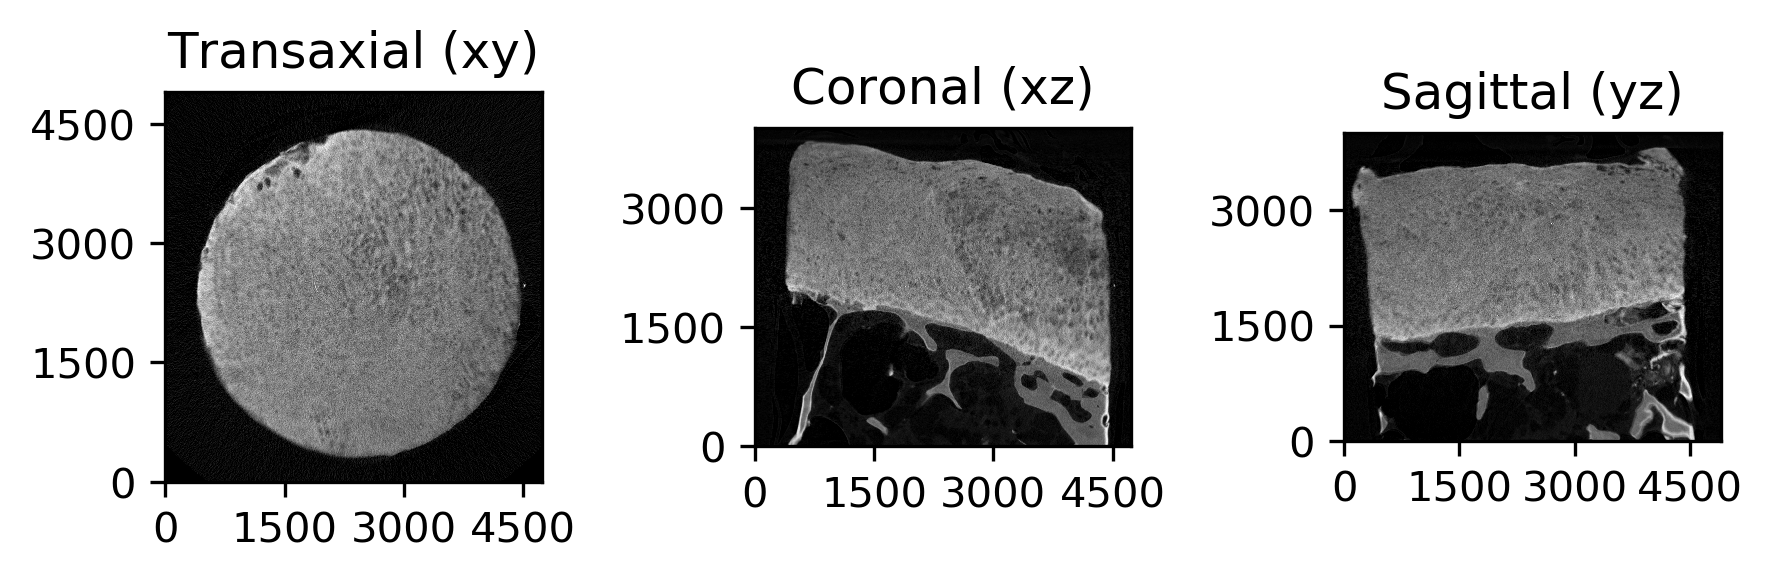

Saved to: Z:\3DHistoData\4mm images\Images\KP03-L6-4MP2_Rec_input_render.png
2. Orient sample


FloatProgress(value=0.0, description='Orienting:')

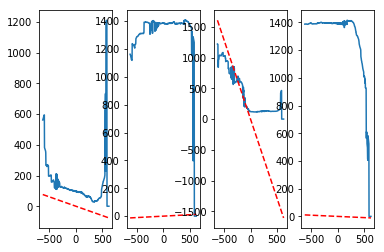

c:\pyenv\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


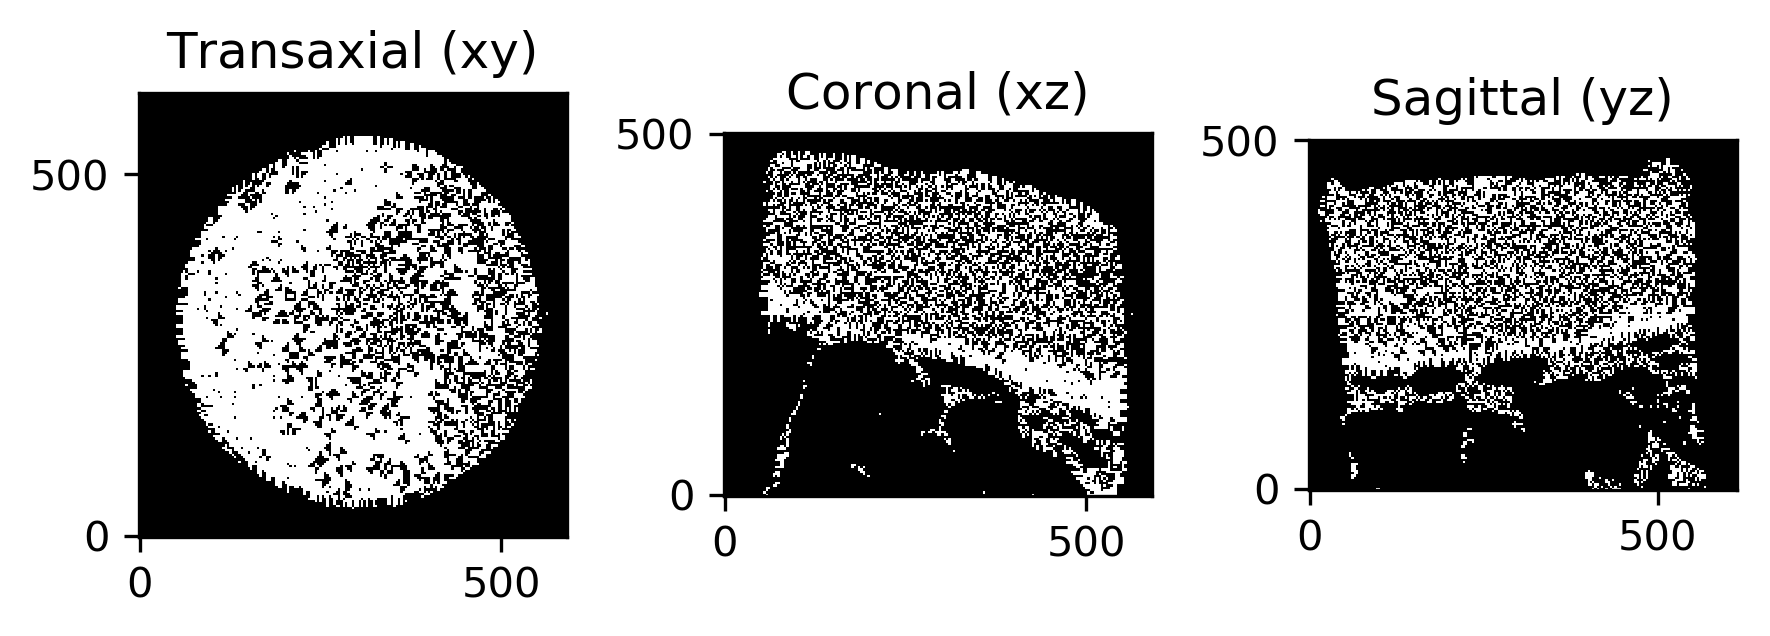

BBox angles: [-2.8889089], [-34.850025]
PCA angles: [[-87.17626358]], [[-63.85827047]]
Gradient descent angles: 5.4375, 6.4375


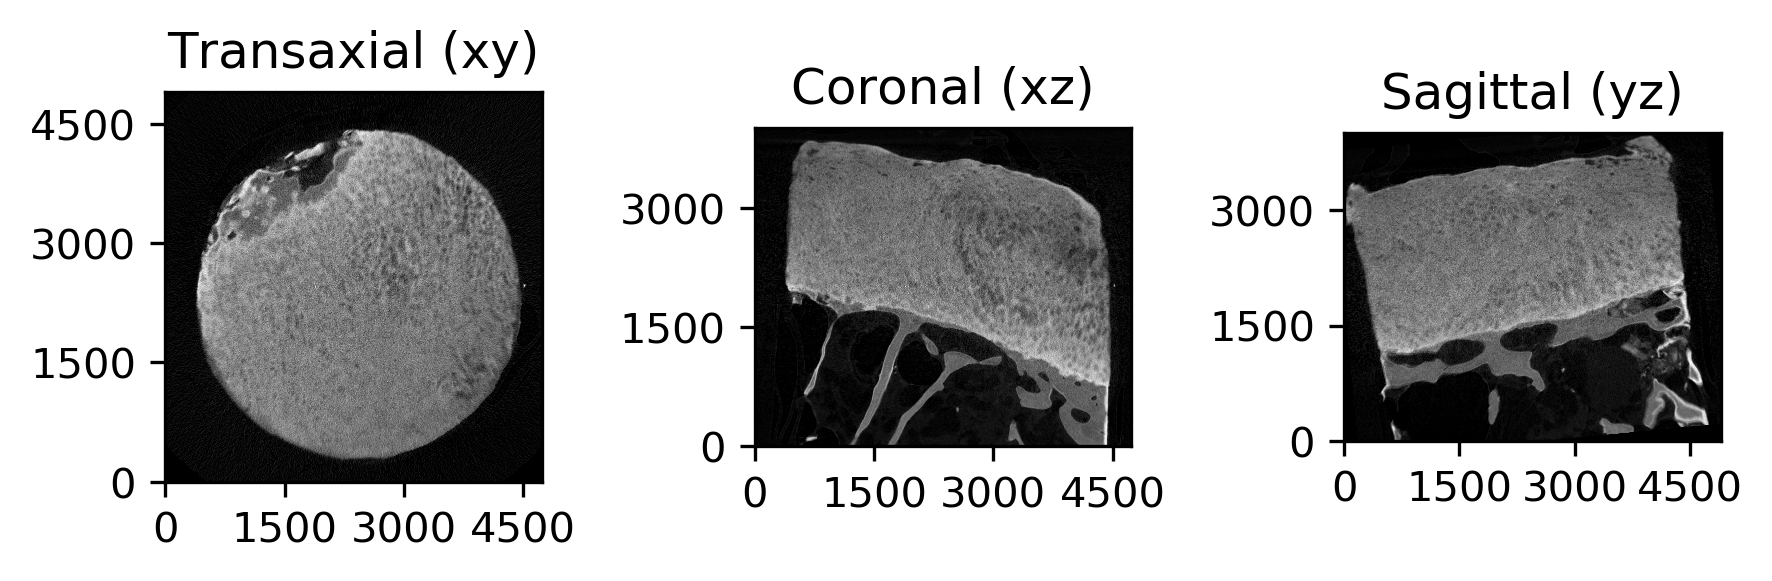

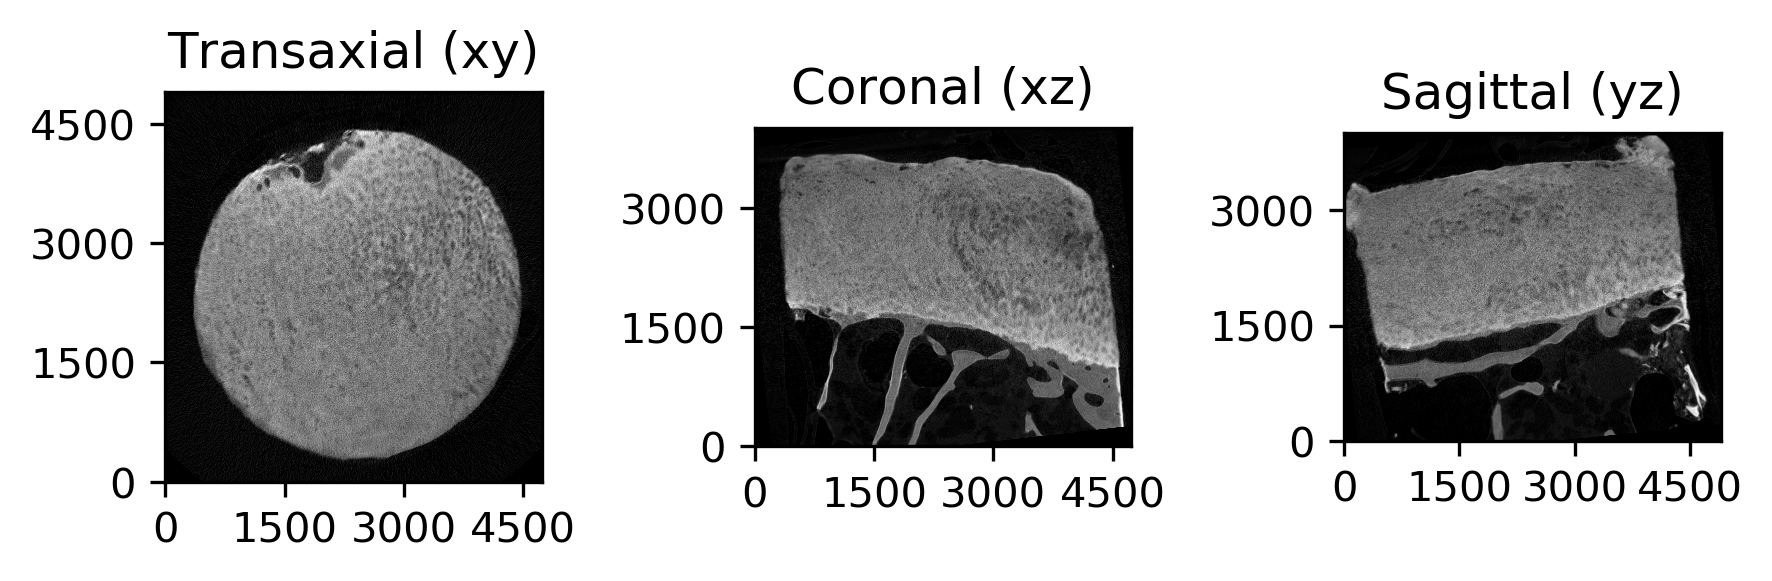

Saved to: Z:\3DHistoData\4mm images\Images\KP03-L6-4MP2_Rec_orient_render.png
3. Crop and flip center volume:


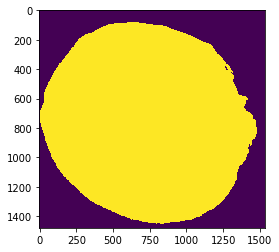


Sum image along z-axis


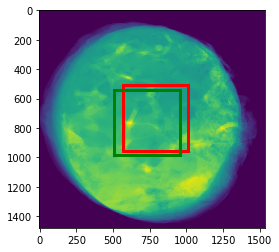

Center moment (green): x = 732, y = 763
Center of mass (red): x = 790.0, y = 732.0
Center moment selected


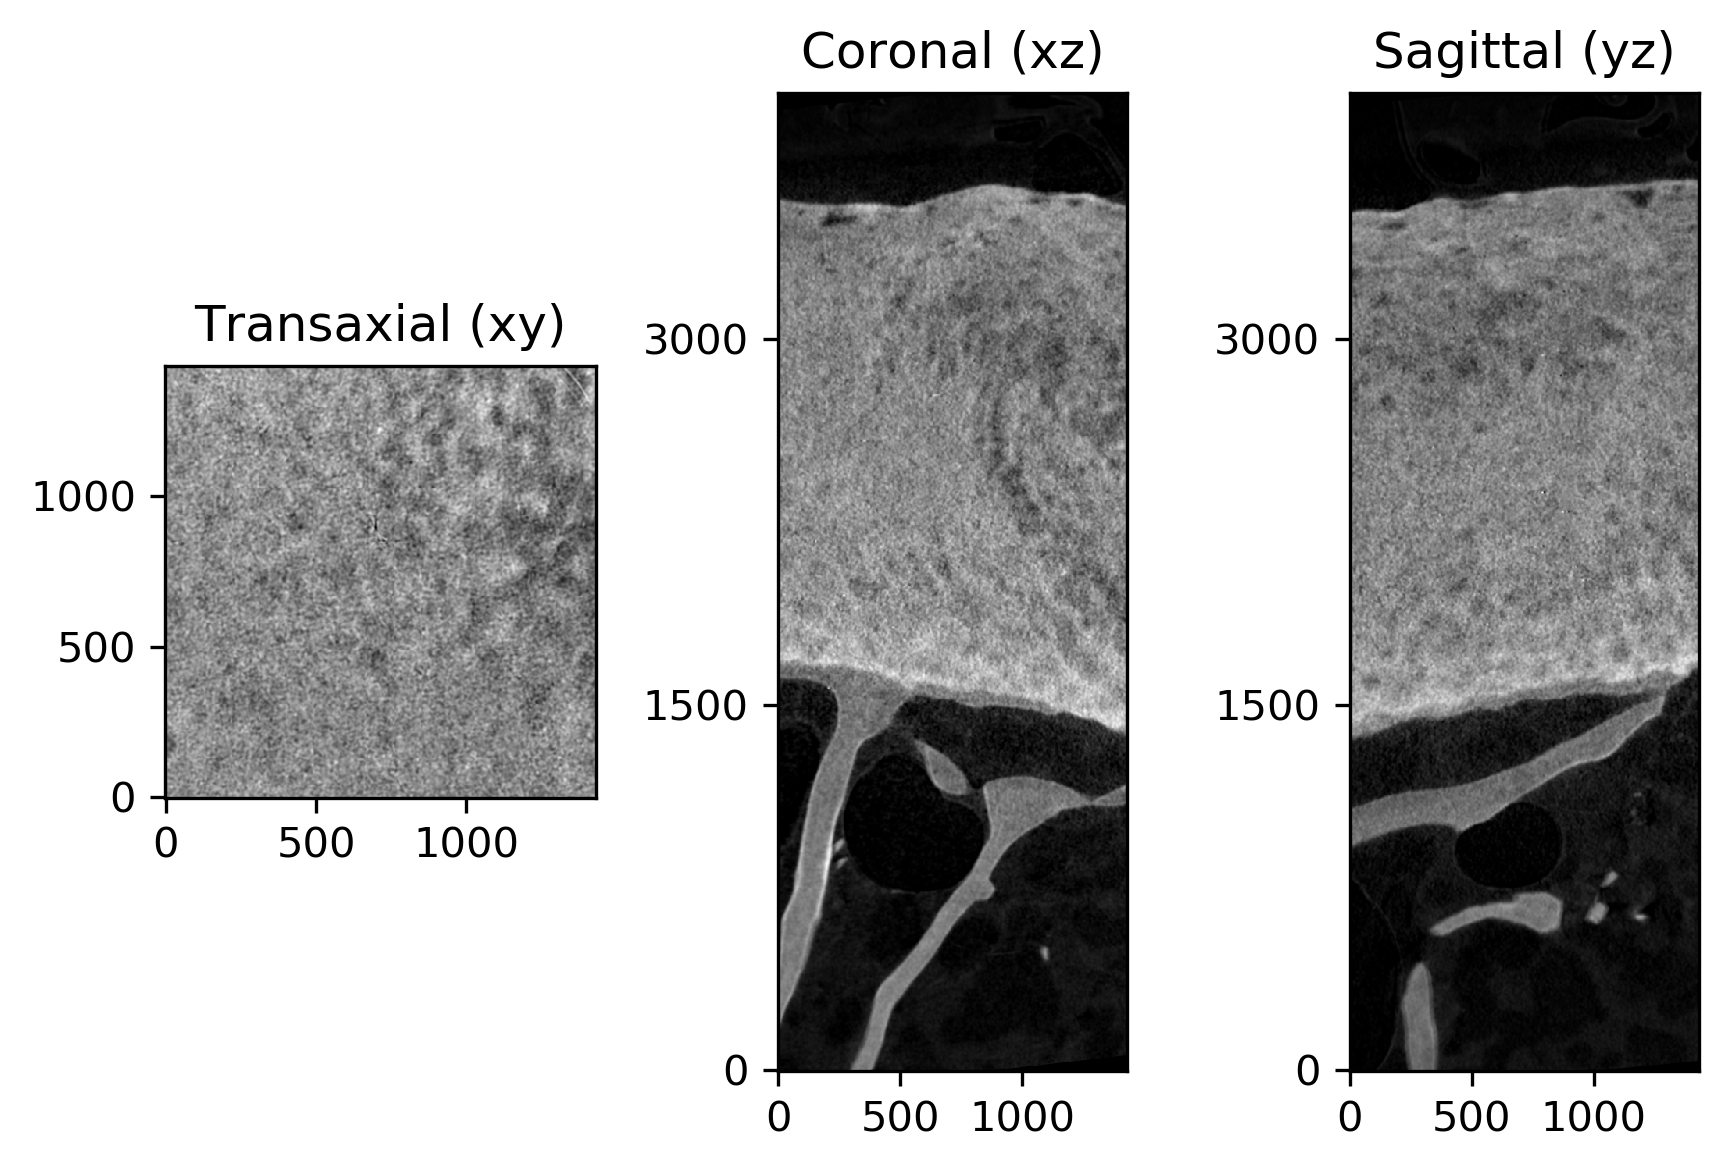

(448, 448, 1253)
Saved to: Z:\3DHistoData\4mm images\Images\KP03-L6-4MP2_Rec_orient_cropped_render.png


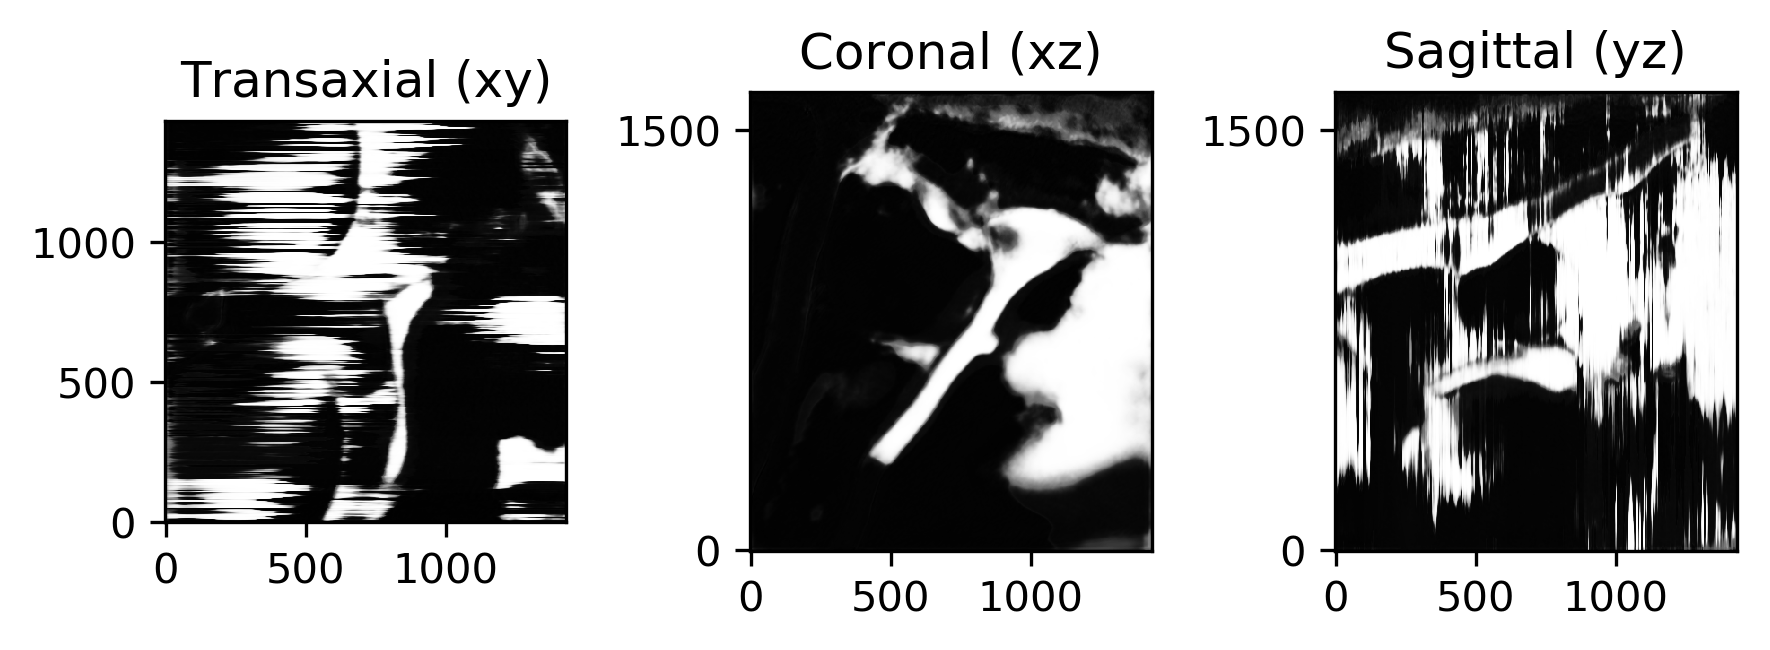

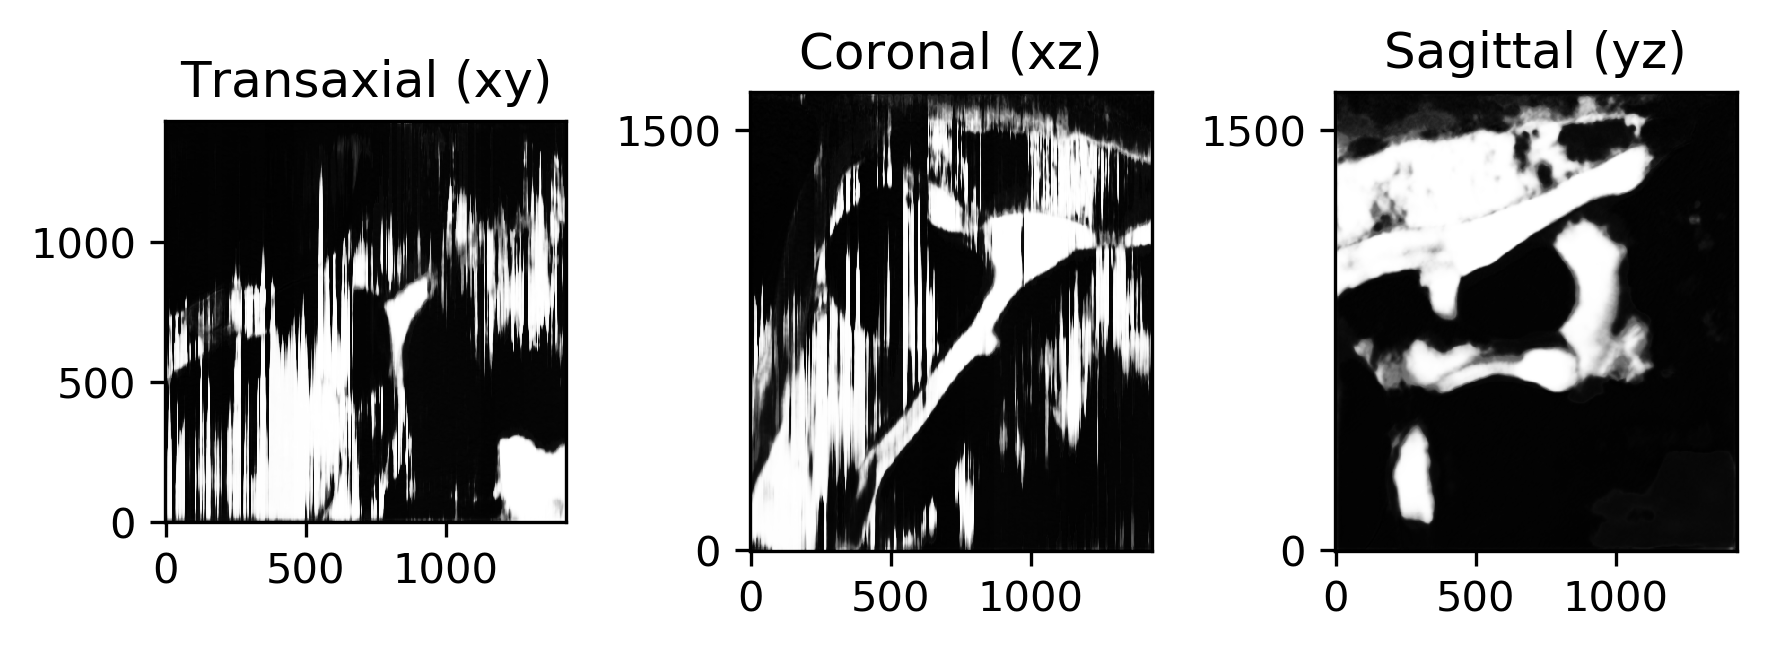

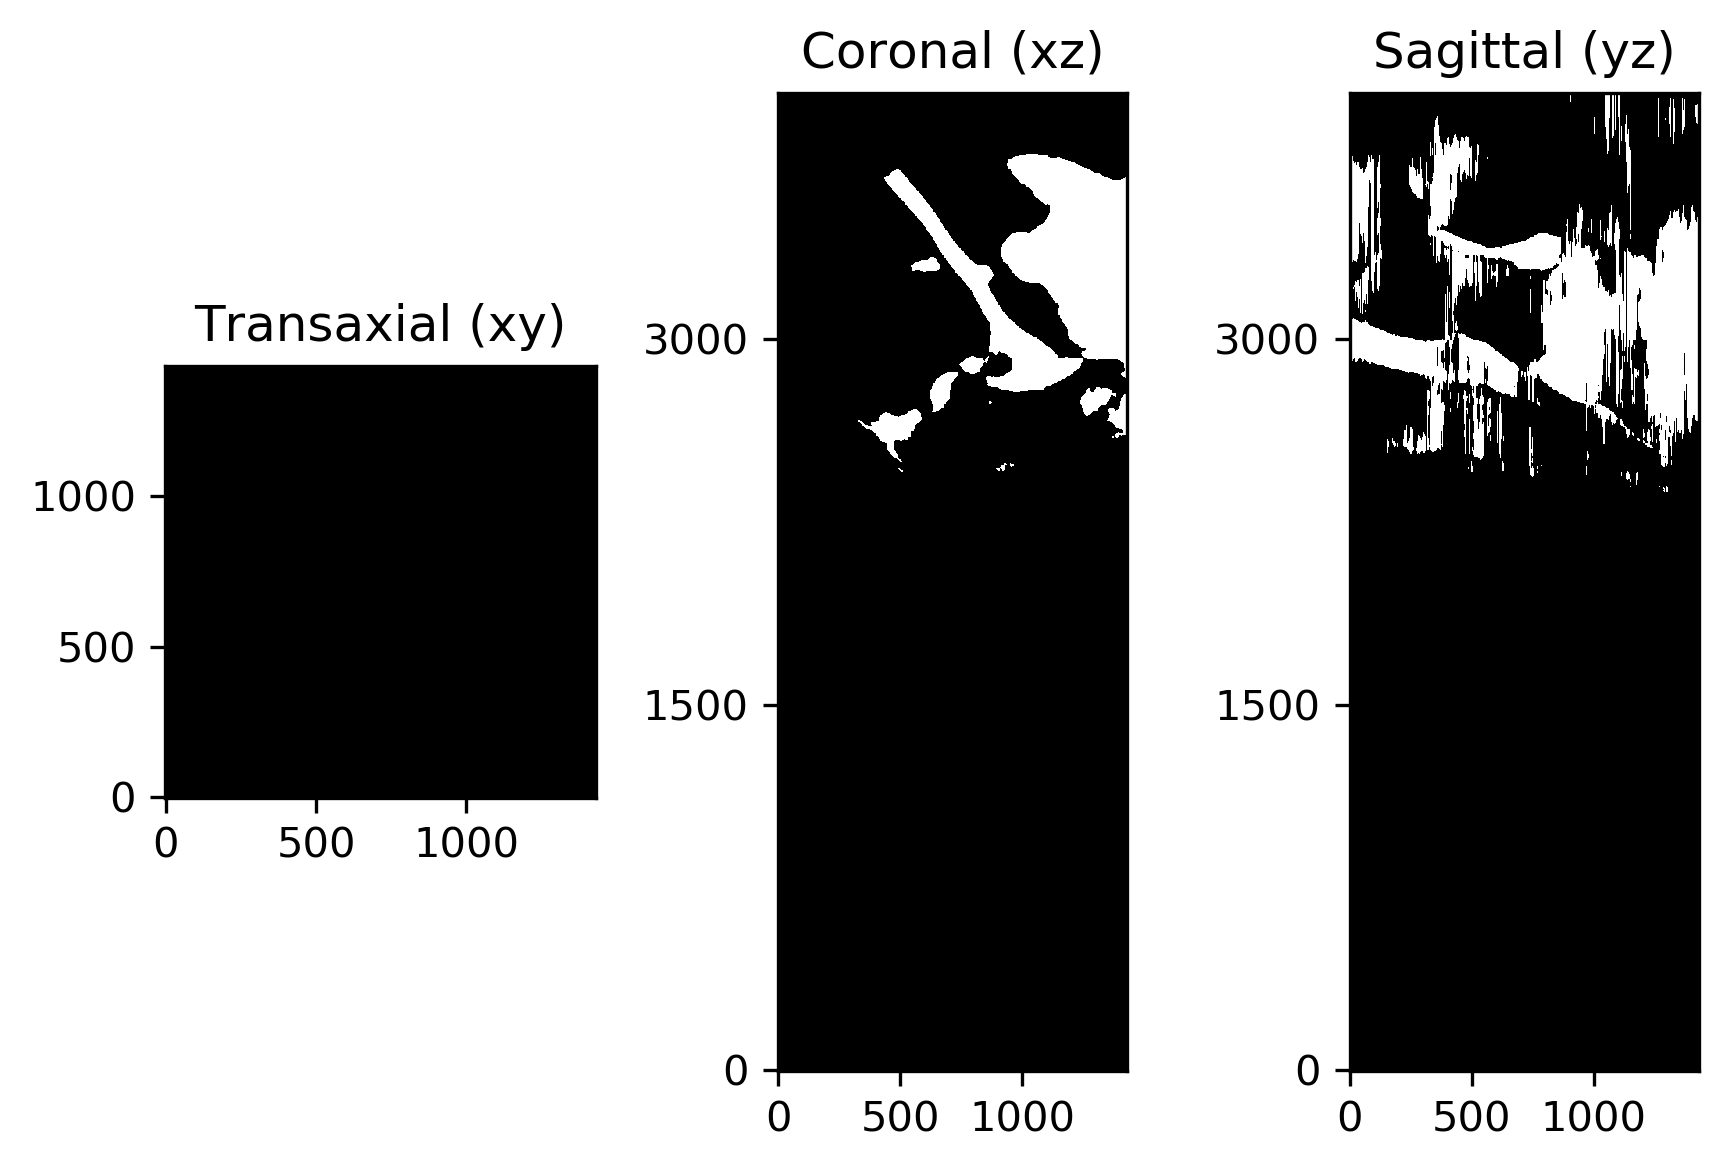

Saved to: Z:\3DHistoData\4mm images\Images\KP03-L6-4MP2_Rec_mask_render.png


ValueError: operands could not be broadcast together with shapes (400,400) (448,448) 

In [2]:
#path = r"X:\PTA1272\Isokerays_PTA\KP03-L6-4MP2\KP03-L6-4MP2_Rec"
path = r"Z:\3DHistoData\Test data\KP03-L6-4MP2_Rec"
sample = path.split('\\')[-1]
#modelpath = [r"Z:\Tuomas\Models\UNET_384x448.model", r"Z:\Tuomas\Models\UNET_448x448.model", r"Z:\Tuomas\Models\UNET_512x448.model"]
modelpath = "Z:/Santeri/3DGradingModels/PythonGrading/Segmentation/unet/"
snapshots = "Z:/Santeri/3DGradingModels/PythonGrading/Segmentation/2018_12_03_15_25/"
savepath = r"Z:\3DHistoData\4mm images"
size = [448, 25, 10, 150, 50]# width, surf depth, offset, deep depth, cc depth
Pipeline(path, sample, savepath, size, None, modelpath, False, snapshots)

### Segmentation test

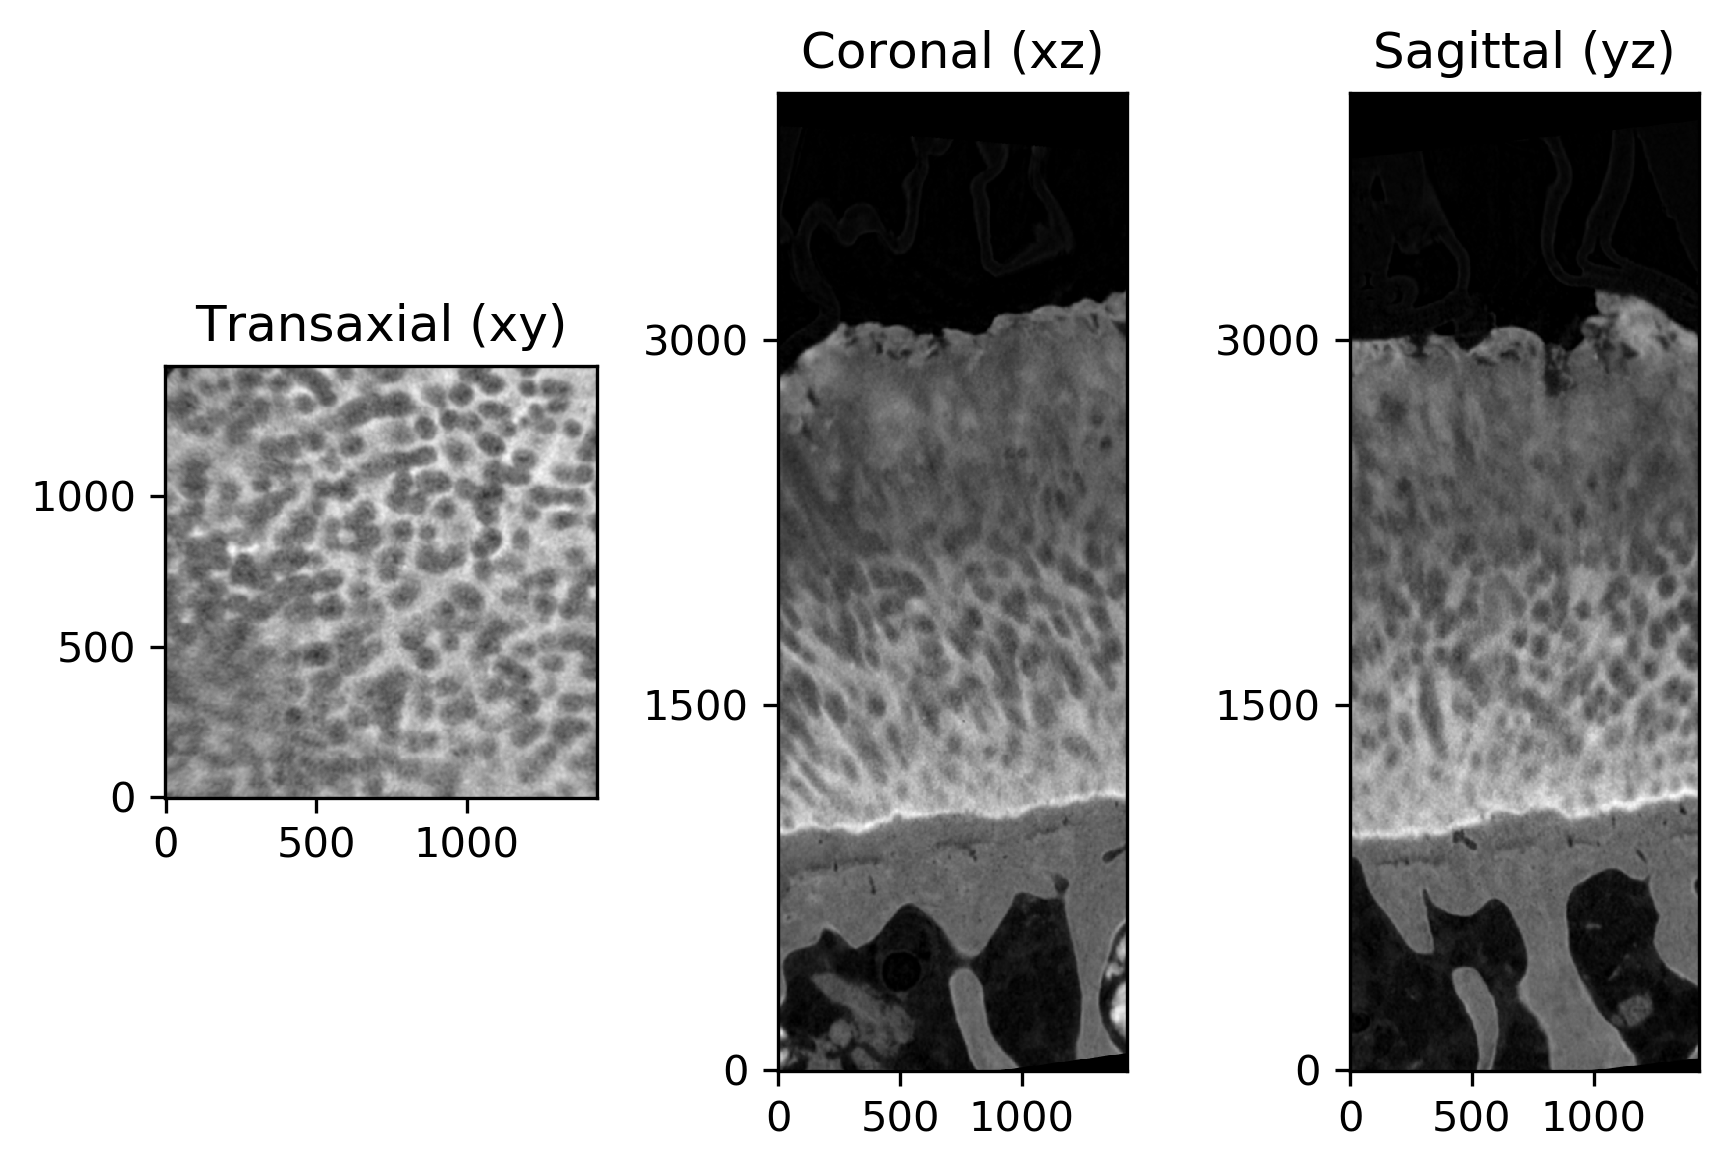

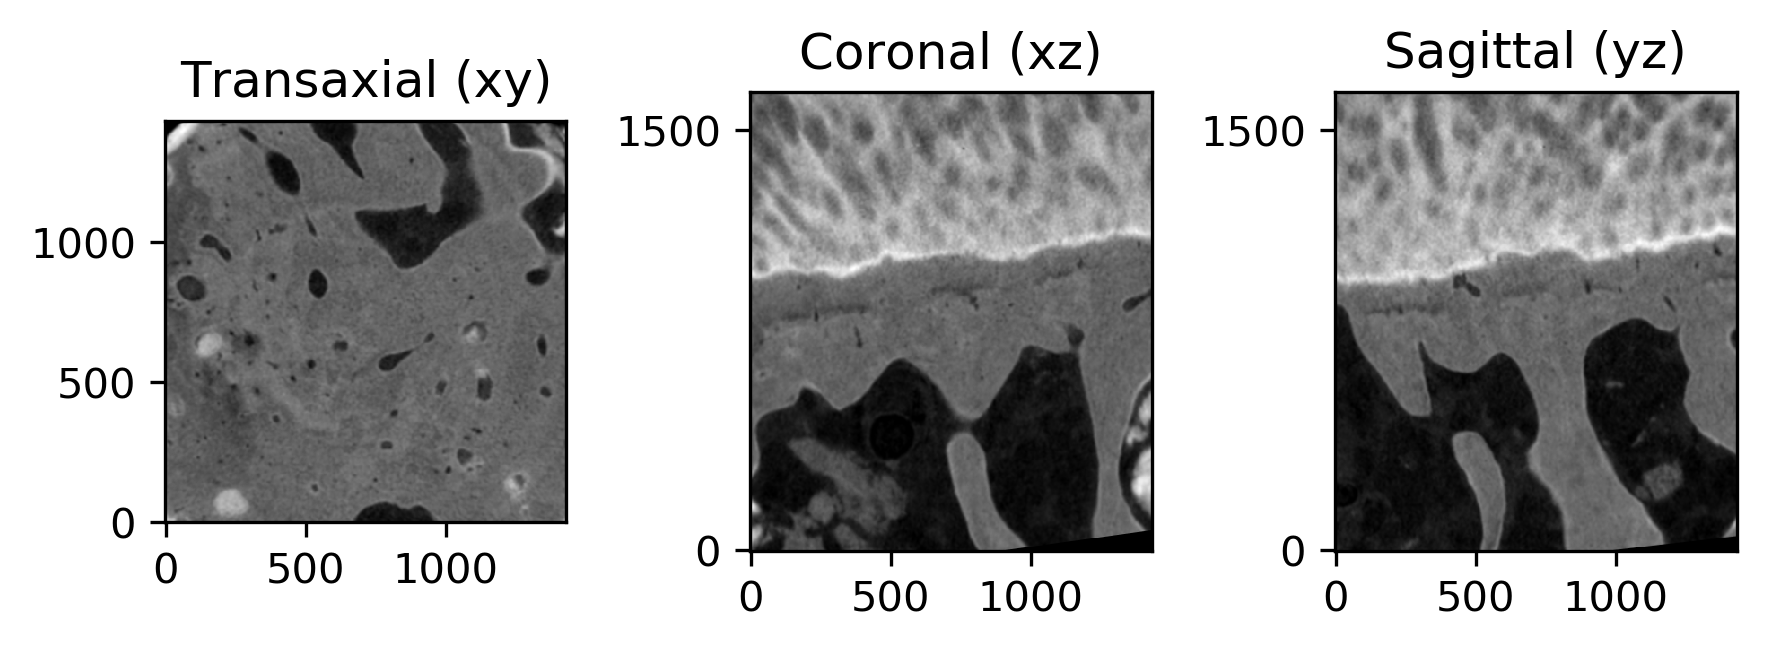

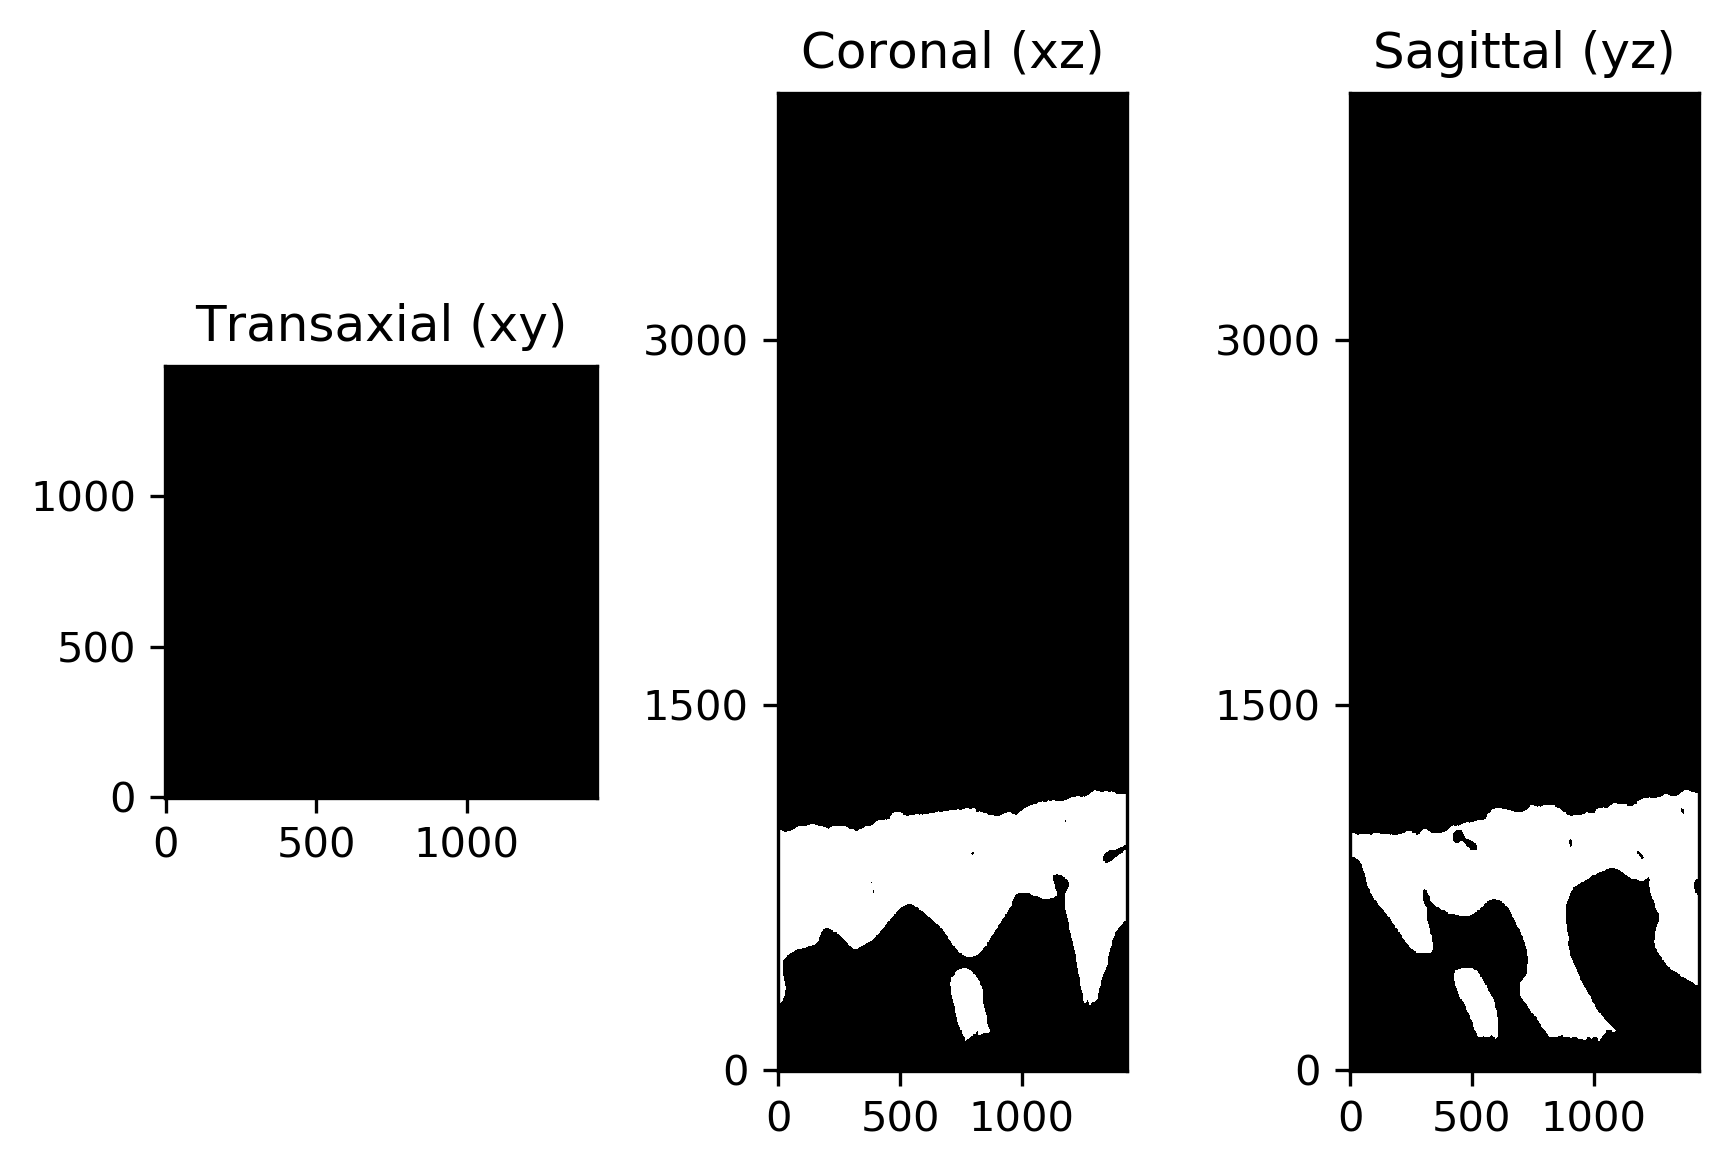

In [2]:
modelpath = "Z:/Santeri/3DGradingModels/PythonGrading/Segmentation/unet/"
snapshots = "Z:/Santeri/3DGradingModels/PythonGrading/Segmentation/2018_12_03_15_25/"
cropsize = 512
offset = 0

data, bounds = load(r"Z:\3DHistoData\4mm images\Data")
data = np.flip(data, 2)
PrintOrthogonal(data)
mask = segmentation(data, modelpath, snapshots, cropsize, offset)

PrintOrthogonal(mask)

In [3]:
RenderVolume(mask * 255, None, False)